# 0.학번 이름

학번: 20183911

이름: 김수현


* 모든 코드에 주석을 작서어해야 점수가 부여됩니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# 1. Artificial Data

- Data 는 $x$ 와 $y$ 간 선형관계로 생성했습니다
- Sample의 수는 `total_samples`

- The collection of data is a $X\in \mathbb{R}^\text{total_samples}$ column vector
- The collection of labels is a $y\in \mathbb{R}^\text{total_samples}$ column vector

- 전체 sample들을 training set 과 test set으로 나눠서 저장함
- training set 과 test set은 모두 `numpy array` 자료 구조로 구성함


In [2]:
np.random.seed(4)
total_samples = 100
num_train_samples = 60
num_val_samples = 40

x = np.vstack([(300-50)*np.random.rand(total_samples-10,1)+50, (450-250)*np.random.rand(10,1)+250])

perm = np.random.permutation(total_samples)
x = x[perm]

y = 2.0*x + 10 + np.sqrt(5000)*np.random.randn(total_samples,1)

X_train = x[0:num_train_samples]
X_val = x[num_train_samples:]
Y_train = y[0:num_train_samples]
Y_val = y[num_train_samples:]

Text(0, 0.5, 'Price')

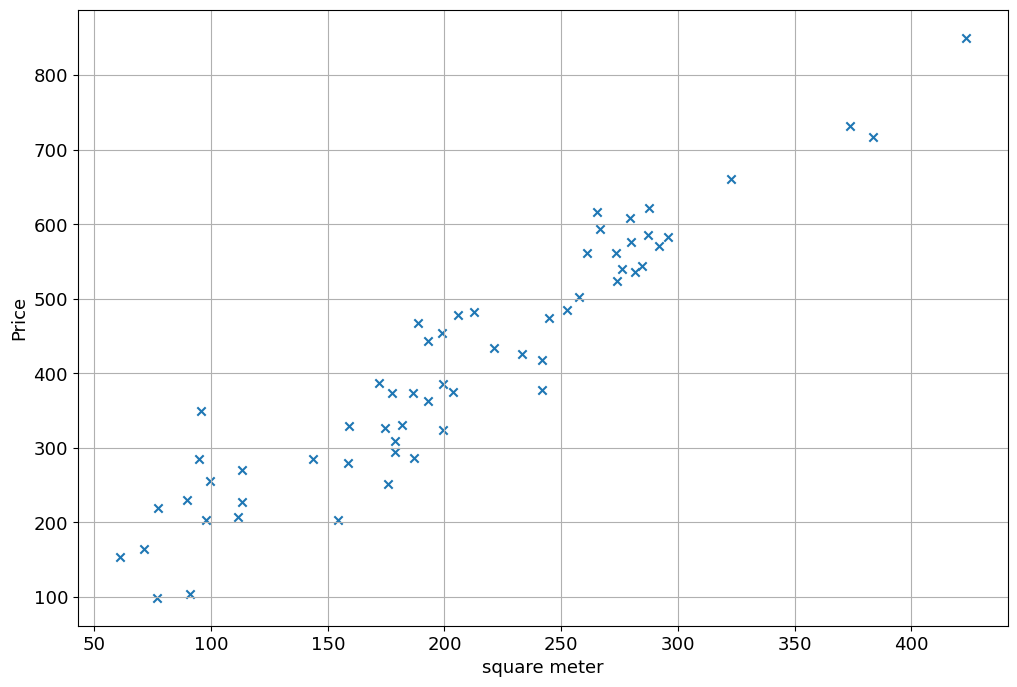

In [3]:
plt.rcParams['font.size'] = 13
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(X_train, Y_train, marker = 'x')
#plt.scatter(X_test, Y_test, marker = 'o', color = 'red')
plt.grid()
plt.xlabel('square meter')
plt.ylabel('Price')


# 표기 정리

위에서 각 정의된 변수들을 살펴서 수업 표기법과 비교해드립니다. 
`numpy array` `X_train`에 있는 각 원소들은 $x^{(i)}$들을 모아둔 array 입니다. 
예를 들어서 

- $x^{(1)}$ = `X_train[0]`, $x^{(2)}$ = `X_train[1]`
- $y^{(1)}$ = `Y_train[0]`, $y^{(2)}$ = `Y_train[1]`

즉
\begin{align*}
\text{X_train} = \begin{bmatrix}
\text{X_train[0]} \\
\text{X_train[1]}\\
\vdots\\
\text{X_train[m-1]}
\end{bmatrix} = \begin{bmatrix}
(x^{(1)})^T\\
(x^{(2)})^T\\
\vdots\\
(x^{(m)})^T
\end{bmatrix}
\end{align*}

# 2. Normalization

## Problem 1 
Dataset과 Label set의 mean, variance를 구하세요

- Dataset의 mean, variance를 각각 `mu_x`, `sigma2_x` 에 저장하세요

In [15]:
# 답 작성

mu_x = np.mean(X_train, axis=0)
sigma2_x = np.mean((X_train-mu_x)**2, axis=0)

# 본 예제에서 feature는 1이지만 일반적으로 사용하기 위해서 각 feature별 평균과 분산을 구하기 위해 (axis=0)이라는 조건을 넣어줬습니다.

In [16]:
print('mu_x=', mu_x)
print('sigma2_x=', sigma2_x)

mu_x= [205.26061988]
sigma2_x= [6624.06438237]


## Problem 2 

- Sample을 normalized 하여 `Xbar`에 저장하세요
- 루트 함수: `np.sqrt()`

In [26]:
# 답 작성
Xbar = (X_train - mu_x)/ np.sqrt(sigma2_x)

# X_train을 정규화하여 만든 Xbar는 평균이 0이고 분산이 1인 새로운 data set이 됩니다.

- Normalization이 잘 수행되었는지 확인

In [27]:
print('Mean of Xbar =', np.mean(Xbar, axis = 0))
print('Variance of Xbar =', np.var(Xbar, axis = 0))

Mean of Xbar = [3.74700271e-17]
Variance of Xbar = [1.]


- Normalized data plot

Text(0, 0.5, 'Price')

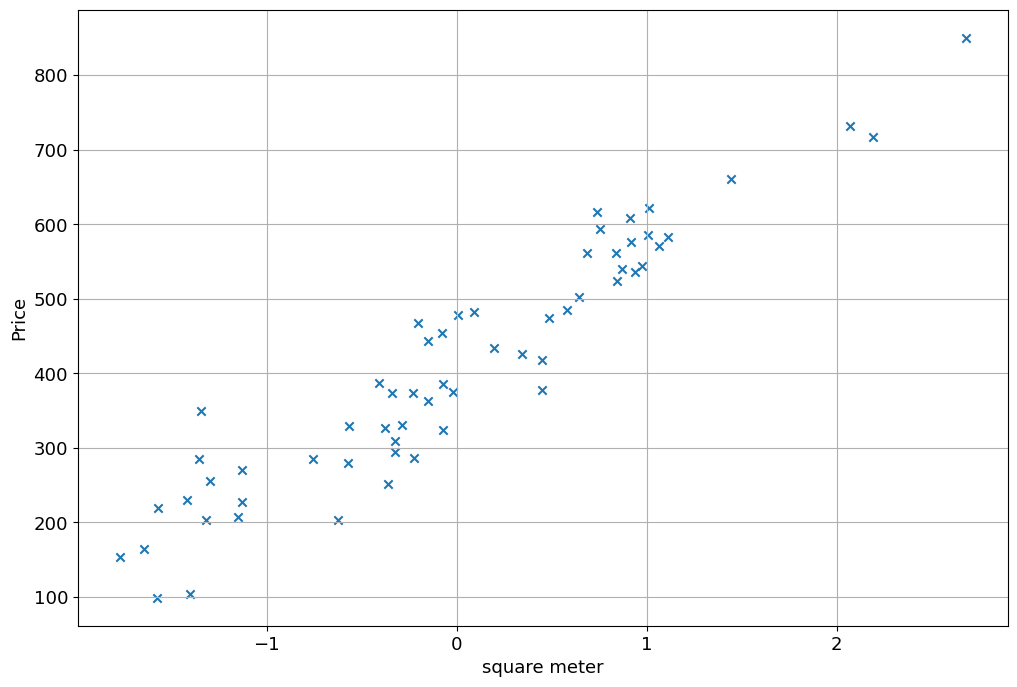

In [28]:
plt.rcParams['font.size'] = 13
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(Xbar, Y_train, marker = 'x')
#plt.scatter(X_test, Y_test, marker = 'o', color = 'red')
plt.grid()
plt.xlabel('square meter')
plt.ylabel('Price')


# 2. One-Trick


In [29]:
Xtilde = np.hstack([np.ones((num_train_samples, 1)), Xbar])

In [30]:
Xtilde

array([[ 1.        ,  0.68395692],
       [ 1.        , -0.34034   ],
       [ 1.        ,  0.58086302],
       [ 1.        ,  0.93894947],
       [ 1.        , -0.07303217],
       [ 1.        , -0.32654705],
       [ 1.        ,  0.34265027],
       [ 1.        , -1.15369321],
       [ 1.        ,  1.06276677],
       [ 1.        ,  2.67721792],
       [ 1.        , -1.30042376],
       [ 1.        ,  0.84044214],
       [ 1.        , -1.34723534],
       [ 1.        , -1.57531472],
       [ 1.        , -0.0778808 ],
       [ 1.        , -1.64759709],
       [ 1.        , -1.57032403],
       [ 1.        ,  0.91333876],
       [ 1.        ,  0.08834995],
       [ 1.        ,  1.11305296],
       [ 1.        ,  0.48637315],
       [ 1.        , -1.40437854],
       [ 1.        ,  2.1885801 ],
       [ 1.        , -1.35789871],
       [ 1.        ,  0.97228007],
       [ 1.        , -0.28607795],
       [ 1.        ,  0.44958055],
       [ 1.        , -0.62744288],
       [ 1.        ,

# 3. Define Model

In [31]:
def model(x, theta):
    return np.matmul(x, theta)

예를 들어서 $\theta_1 = 400$, $\theta_0 = 400$ 일때 $h_\theta(x^{(1)})$은

In [32]:
theta = np.array([[400], [400]])
model(Xtilde, theta)

array([[ 673.58276695],
       [ 263.86400144],
       [ 632.34520694],
       [ 775.57978964],
       [ 370.78713274],
       [ 269.3811809 ],
       [ 537.06010967],
       [ -61.47728314],
       [ 825.10670981],
       [1470.88716778],
       [-120.16950488],
       [ 736.17685442],
       [-138.89413689],
       [-230.1258879 ],
       [ 368.84767808],
       [-259.03883469],
       [-228.1296131 ],
       [ 765.33550584],
       [ 435.33998123],
       [ 845.22118208],
       [ 594.54925909],
       [-161.75141554],
       [1275.432038  ],
       [-143.15948236],
       [ 788.91202945],
       [ 285.56881911],
       [ 579.83222168],
       [ 149.02284973],
       [ 392.03862377],
       [1228.25295966],
       [ 254.39020149],
       [ 477.38298108],
       [ 309.31106784],
       [-308.80216131],
       [ 339.91313738],
       [ 172.82274361],
       [ 236.21140906],
       [ -52.2269994 ],
       [ 978.21546935],
       [ 171.15774563],
       [ -51.37025979],
       [ 766.070

- `model` 함수가 잘 작성되었는지 추가로 확인합시다
- For some random choice $\theta = [8.0, 3.0]^T$ we have the estimates as follows

(-2.0, 3.0)

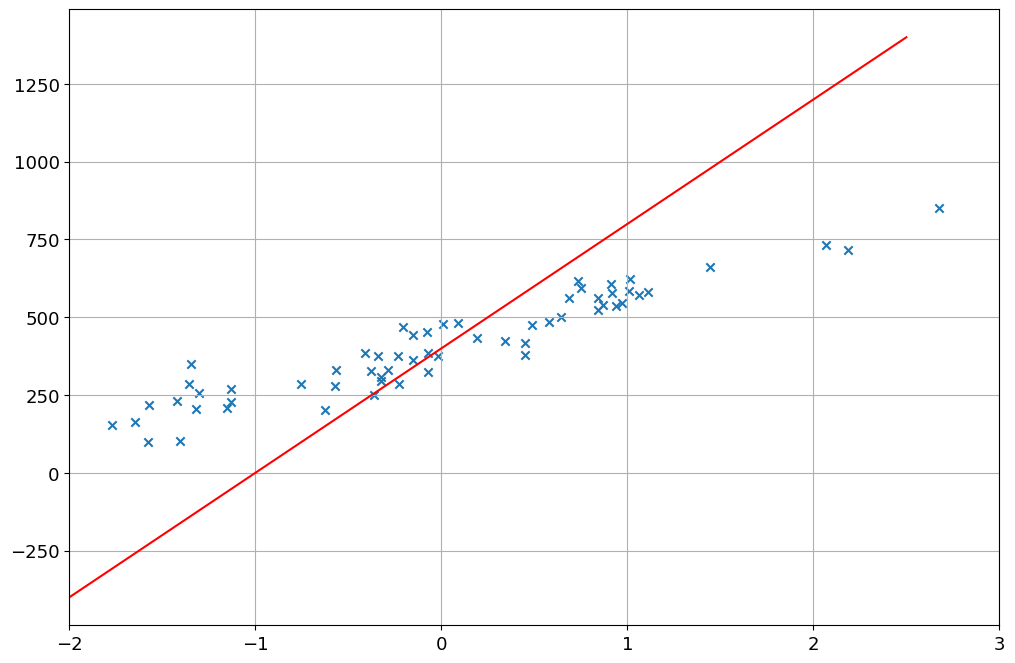

In [33]:
x_arange = np.arange(-2, 3, 0.5).reshape(-1,1)
x_arange_tilde = np.hstack([np.ones((x_arange.shape[0],1)), x_arange])
hx_test_theta_3 = model(x_arange_tilde, theta)
plt.plot(x_arange, hx_test_theta_3, color = 'red')
plt.scatter(Xbar, Y_train, marker = 'x')
plt.grid()
plt.xlim([-2, 3])

# 3. Define Cost Function
\begin{align*}
\text{output} = \frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)})- y^{(i)})^2
\end{align*}

In [34]:
def mmse_cost(hx, y):
    return np.mean((hx-y)**2, axis=0)


역시 잘 작성되었는지 확인해보도록 합시다.
우선 재미로 $\theta = [400,\, 150]^T$ 인 모델과 $\theta = [400,\, 400]^T$ 모델의 크기를 비교해보죠

In [35]:
theta2 = np.array([[400],[150]])
theta3 = np.array([[400],[400]])

hx_theta2 = model(Xtilde, theta2)
hx_theta3 = model(Xtilde, theta3)
print('theta = theta2 model loss = ', mmse_cost(hx_theta2, Y_train))
print('theta = theta3 model loss = ', mmse_cost(hx_theta3, Y_train))

theta = theta2 model loss =  [2900.22319236]
theta = theta3 model loss =  [62653.53653625]


# Finding the optimal model via Gradient Descent Algorithm
- 다음 학습은 gradient descent (GD) algorithm을 통해서 최적 모델을 찾도록 하죠
- 우선 loss 함수가 어떻게 생겼는지 한번 보도록 하겠습니다.

In [36]:
def model_grid(x, theta0_grid, theta1_grid):
    hx = []
    for xx in x:
        hx.append(theta1_grid*xx+theta0_grid)
    return np.array(hx)

def mmse_cost_grid(hx, Y_train):
    cost = []
    for i, hhx in enumerate(hx):
        cost.append((hhx-Y_train[i])**2)
    return np.mean(np.array(cost), axis=0)
        

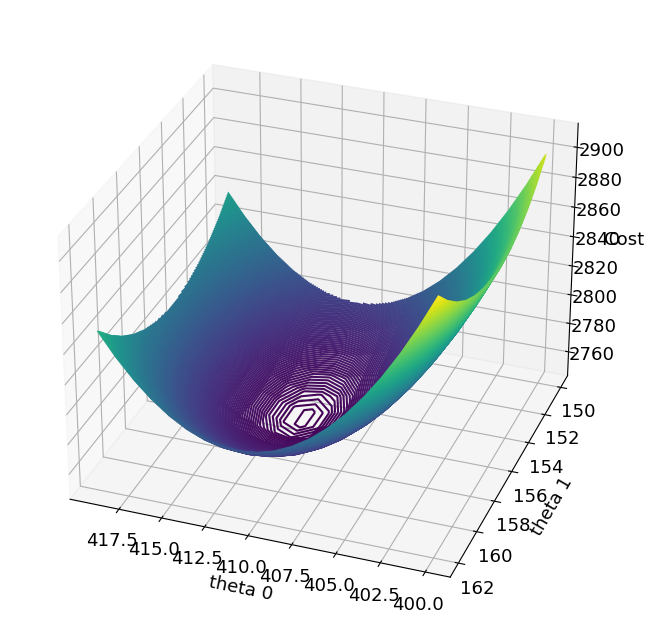

In [37]:
theta1_range = np.arange(150, 163, 1)
theta0_range = np.arange(400, 420, 1)


theta1_grid, theta0_grid = np.meshgrid(theta1_range, theta0_range)
loss_grid = mmse_cost_grid(model_grid(Xbar, theta0_grid, theta1_grid), Y_train)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(theta0_grid, theta1_grid, loss_grid, 300)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost');
ax.view_init(30, 110)

plt.grid()

\begin{align*}
\nabla_\theta J(\theta)&= \begin{bmatrix}
\frac{1}{m}\sum_{i=1}^m  2\left( \theta_1 x^{(i)}+\theta_0- y^{(i)}\right)\\
\frac{1}{m}\sum_{i=1}^m  2\left( \theta_1 x^{(i)}+\theta_0- y^{(i)}\right)x^{(i)}\\
\end{bmatrix}\\
&= \frac{1}{m}\sum_{i=1}^m  2\left( \theta_1 x^{(i)}+\theta_0- y^{(i)}\right) \begin{bmatrix}
1 \\
x^{(i)}
\end{bmatrix}\\
&= \frac{1}{m}\sum_{i=1}^m  2\left( \theta_1 x^{(i)}+\theta_0- y^{(i)}\right) \tilde x^{(i)}
\end{align*}


In [38]:
def mmse_gradient(theta, x, y):
    return np.mean(2.0*(np.matmul(x, theta)-y)*x, axis=0).reshape(-1,1)

In [39]:
theta = np.array([[411.127],[155.49]])

In [45]:
mmse_gradient(theta, Xtilde, Y_train)

array([[-0.00050246],
       [-0.00674662]])

## Implementing GD
\begin{align*}
\theta &\leftarrow \theta - \alpha \nabla_\theta J(\theta)
\end{align*}

In [46]:
def gradient_descent(x, y, t_init, lr, num_epoch):
    theta_list = np.empty((2, num_epoch))
    loss_list = np.empty(num_epoch)
    theta_list[:,0] = t_init.squeeze()
    loss_list[0] = mmse_cost(model(x, theta[:,0].reshape(-1,1)), y)
    for i in np.arange(1,num_epoch):
        theta_list[:,i] = theta_list[:,i-1] - lr*mmse_gradient(theta_list[:,i-1].reshape(-1,1), x, y).squeeze()
        loss_list[i] = mmse_cost(model(x, theta_list[:,i].reshape(-1,1)), y)
    
    return theta_list, loss_list
        

In [47]:
num_epoch = 100
lr = 0.1
t_init = np.array([[12.0], [3.0]])

ts_gd_array, loss_gd_array = gradient_descent(Xtilde, Y_train, t_init, lr, num_epoch)
ts_gd = ts_gd_array[:,-1].reshape(-1,1)
print('gradient descent theta star = ', ts_gd)

gradient descent theta star =  [[411.12725113]
 [155.49337327]]


- 잘 되었는지 확인을 위해서 다음을 구해보죠.

In [49]:
mmse_gradient(ts_gd, Xtilde, Y_train)


array([[-2.03259131e-07],
       [-7.76586446e-08]])

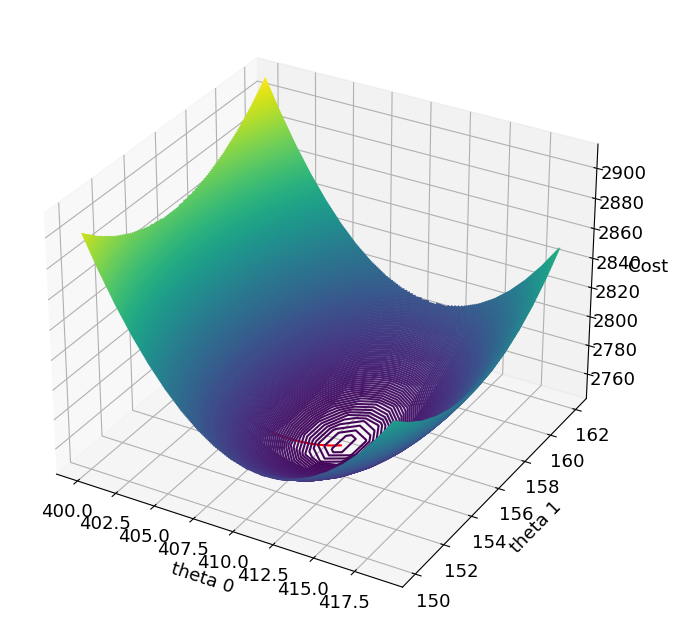

In [50]:
lr = 0.1
num_epoch = 20
t_init = np.array([[400],[150]])

theta_gd_array, loss_gd_array = gradient_descent(Xtilde, Y_train, t_init, lr, num_epoch)

theta1_range = np.arange(150, 163, 1)
theta0_range = np.arange(400, 420, 1)

theta1_grid, theta0_grid = np.meshgrid(theta1_range, theta0_range)
loss_grid = mmse_cost_grid(model_grid(Xbar, theta0_grid, theta1_grid), Y_train)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(theta0_grid, theta1_grid, loss_grid, 300)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost');

ax.plot3D(theta_gd_array[0,1:], theta_gd_array[1,1:], loss_gd_array[1:], color='red')
plt.grid()



# Epoch vs. Loss curve (Training)

기계학습에서 중요한 plot 중 하나는 학습 진척도를 epoch 별로 보여주는 epoch vs. Loss curve 입니다.
아래 그리는 방법은 필히 알아두시기 바랍니다.


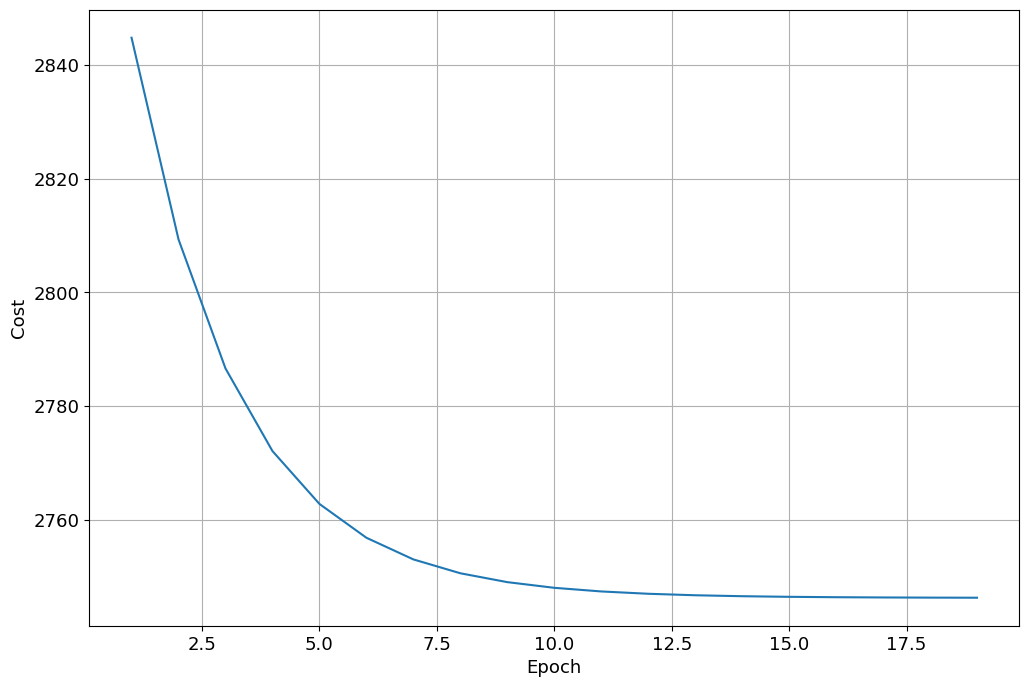

In [51]:

plt.plot(np.arange(1,num_epoch), loss_gd_array[1:])
#plt.semilogy(np.arange(0,num_epoch), loss_gd_array)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid()

최적 모델의 성능 보기

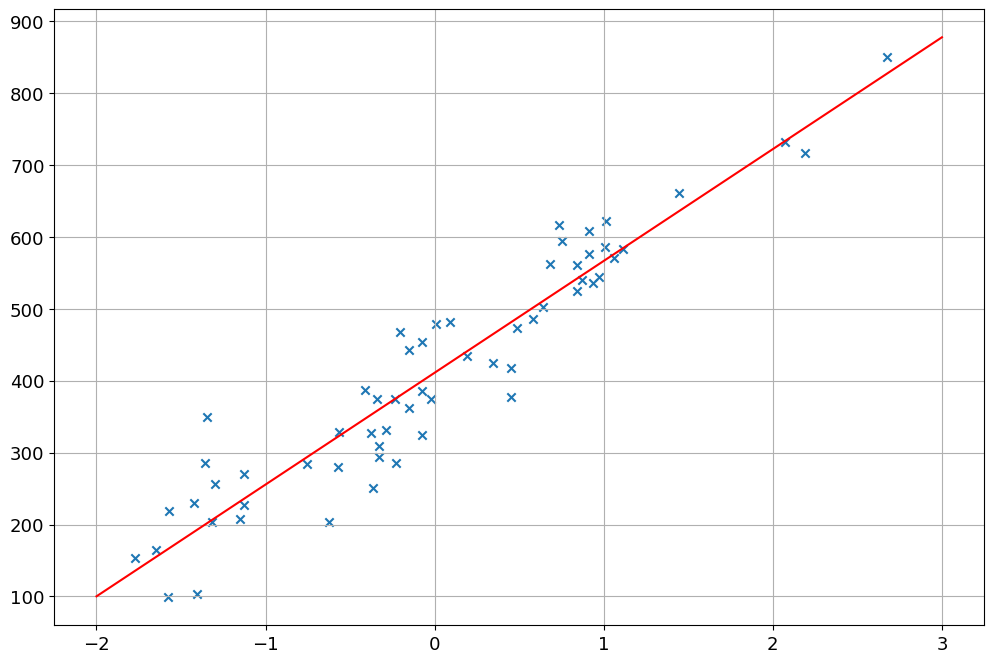

In [52]:
x_arange = np.arange(-2, 3.5, 0.5).reshape(-1,1)
x_arange_tilde = np.hstack([np.ones((x_arange.shape[0],1)), x_arange])

hx_test_theta_3 = model(x_arange_tilde, ts_gd)
plt.plot(x_arange, hx_test_theta_3, color = 'red')
plt.scatter(Xbar, Y_train, marker = 'x')
plt.grid()

In [53]:
ts_gd

array([[411.12725113],
       [155.49337327]])

# Validation

다음은 test sample에 대한 성능 검증을 해보도록 하겠습니다

Text(0, 0.5, 'Price')

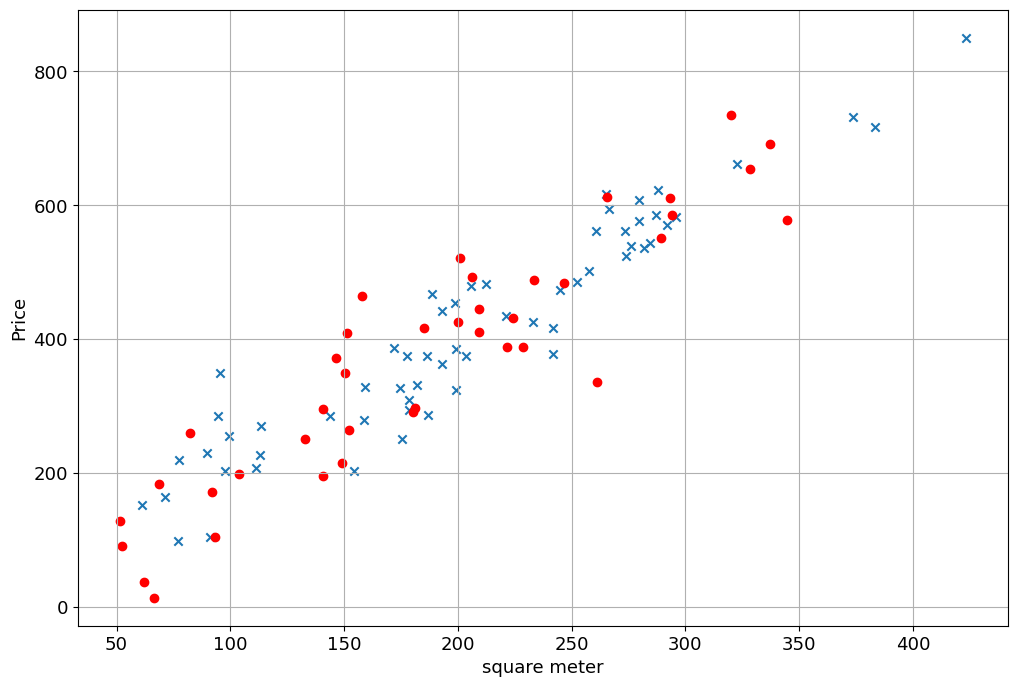

In [54]:
plt.rcParams['font.size'] = 13
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(X_train, Y_train, marker = 'x')
plt.scatter(X_val, Y_val, marker = 'o', color = 'red')
plt.grid()
plt.xlabel('square meter')
plt.ylabel('Price')


# Validation

## Problem 3
Validation set `X_val`을 model에 적용할 수 있도록 `mu_x`, `sigma2_x`로 normalize하세요


In [62]:
# 답작성

Xbar_val = (X_val - mu_x)/ np.sqrt(sigma2_x)

# Xbar_val을 구할 때, Validation set의 평균과 분산을 다시 구해 적용하는 것이 아니라 training set의 평균과 분산을 그대로 이용합니다.

- Normalization이 잘 수행되었는지 확인

In [63]:
print('Mean of Xbar_val =', np.mean(Xbar_val, axis = 0))
print('Variance of Xbar_val =', np.var(Xbar_val, axis = 0))

Mean of Xbar_val = [-0.23178169]
Variance of Xbar_val = [1.03097649]


## Problem 4
-`Xbar_val` dataset에 onetrick 적용하여 `Xtilde_val`에 저장하세요


In [79]:
Xtilde_val = np.hstack([np.ones((total_samples - num_train_samples,1)), Xbar_val])

# Xbar_val의 모든 x_1이 1인 행렬을 만듭니다.

## Problem 5
- `Gradient_descent` 함수를 valdiation set에 대한 loss 값도 함께 저장하도록 첨부하세요
- 즉, epoch 별로 update하는 theta parameter에 해당하는 validation set loss를 저장하는 array `val_loss_list`를 작성하고 return 해주도록 코드 수정

In [87]:
def gradient_descent_v2(x, y, x_val, y_val, t_init, lr, num_epoch):
    theta_list = np.empty((2, num_epoch))
    loss_list = np.empty(num_epoch)
    val_loss_list = np.empty(num_epoch)
    
    theta_list[:,0] = t_init.squeeze()
    loss_list[0] = mmse_cost(model(x, theta[:,0].reshape(-1,1)), y)
    for i in np.arange(1,num_epoch):
        theta_list[:,i] = theta_list[:,i-1] - lr*mmse_gradient(theta_list[:,i-1].reshape(-1,1), x, y).squeeze()
        loss_list[i] = mmse_cost(model(x, theta_list[:,i].reshape(-1,1)), y)
        # 답 작성
        val_loss_list[i] = mmse_cost(model(x_val, theta_list[:,i].reshape(-1,1)), y_val)
        # x와 y를 validation set의 값으로 바꾸고 loss_list를 구하는 방법과 같은 방법으로 구합니다.
        
    return theta_list, loss_list, val_loss_list

In [88]:
num_epoch = 100
lr = 0.3
t_init = np.array([[12.0], [3.0]])

ts_gd_array, loss_gd_array, val_loss_gd_array = gradient_descent_v2(Xtilde, Y_train, Xtilde_val, Y_val, t_init, lr, num_epoch)
ts_gd = ts_gd_array[:,-1].reshape(-1,1)
print('gradient descent theta star = ', ts_gd)

gradient descent theta star =  [[411.12725123]
 [155.49337331]]


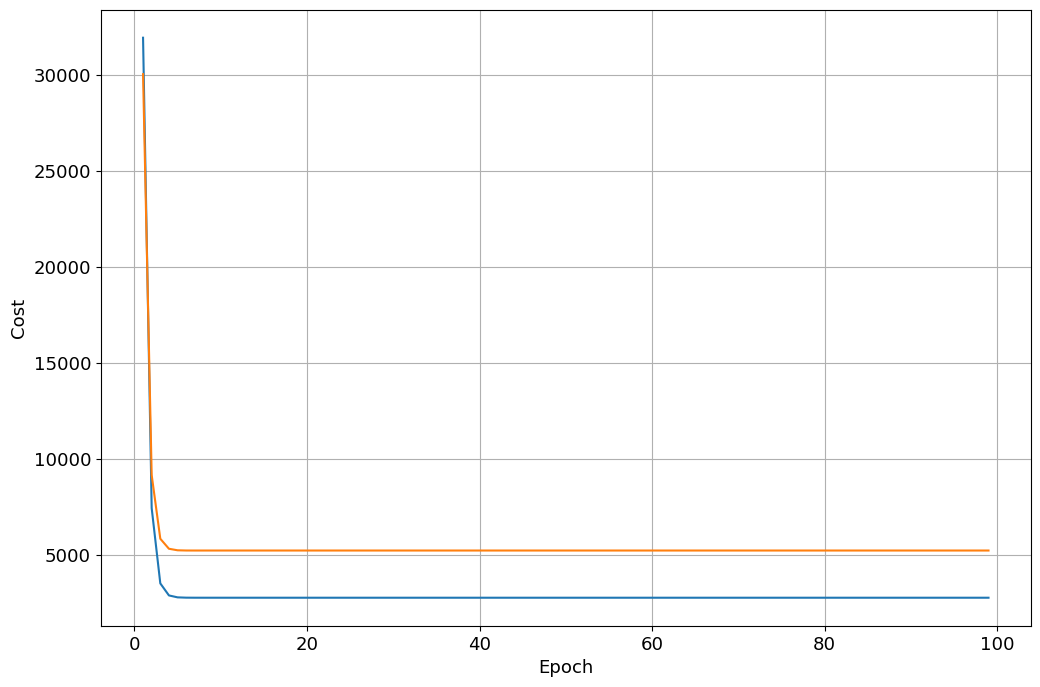

In [89]:

plt.plot(np.arange(1,num_epoch), loss_gd_array[1:])
plt.plot(np.arange(1,num_epoch), val_loss_gd_array[1:])
#plt.semilogy(np.arange(0,num_epoch), loss_gd_array)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid()

# Test time

## Trained model

우리가 찾은 최적 모델은 GD를 통해서 찾은 $\theta^\star$, 즉 `ts_gd`를 적용한 `model` 함수라는 것을 다시한번 강조합니다.


## Problem 6
구한 모델을 이용하여 면적이 300 $m^2$ 인 집의 가격을 예측하도록 코드를 작성하세요

- data를 model에 호환도되록 변형해야한다는 것을 잊지 마세요
    - data normalization 
    - one trick


In [102]:
Xtilde_test.ndim
ts_gd

array([[411.12725123],
       [155.49337331]])

In [117]:
# 답작성
x_test = np.array([300.0])
Xtilde_test = np.hstack([1, (x_test-mu_x)/np.sqrt(sigma2_x)])
y_test = model(Xtilde_test, ts_gd)
y_test

# x_test에 normalization, one trick을 적용한 값과 최적의 theta값을 model함수에 넣은 결과가 y_test 즉, 면적에 대한 가격의 최적 예측치 입니다.

array([592.12790841])

# Appendix: Finding the optimal solution analytically
\begin{align*}
\theta^* = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T\vec{y}
\end{align*}
where 
\begin{align*}
\tilde{X} = \begin{bmatrix}
\mathbf{1}, X
\end{bmatrix}
\end{align*}

In [118]:
Xtilde = np.hstack([np.ones_like(Xbar), Xbar])
ts = np.matmul(np.linalg.inv(np.matmul(Xtilde.T, Xtilde)), np.matmul(Xtilde.T, Y_train))

In [119]:
ts

array([[411.12725123],
       [155.49337331]])